In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import spacy

In [2]:
df=pd.read_json('problems_data.jsonl',lines=True)

In [3]:
df

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree
...,...,...,...,...,...,...,...,...
4107,Tölvunarfræðingar telja,Computer scientists count a bit different from...,Input consists of one line with one integer $n$.,"Output the $n$-th\n number, according to co...","[{'input': '1', 'output': '0'}, {'input': '2',...",easy,1.1,https://open.kattis.com/problems/tolvunarfraed...
4108,Velkomin!,Welcome to Forritunarkeppni Framhaldsskólanna ...,There is no input in this problem.,Print a single line containing VELKOMIN!,"[{'input': '', 'output': 'VELKOMIN!'}]",easy,1.1,https://open.kattis.com/problems/velkomin
4109,Til hamingju,,There is no input in this problem.,Print a single line containing TIL\n HAMING...,"[{'input': '', 'output': 'TIL HAMINGJU MED AFM...",easy,1.1,https://open.kattis.com/problems/tilhamingju
4110,Hipp Hipp,,There is no input in this problem.,Print 20 lines. Each line should contain Hipp ...,"[{'input': '', 'output': 'Hipp hipp hurra! Hip...",easy,1.1,https://open.kattis.com/problems/hipphipp


In [4]:
def join_sample_io(sample):
    if type(sample) != list or len(sample) == 0:
        return ""
    parts = []
    for s in sample:
        if type(s) == dict:
            parts.append("example input " +s.get("input", "") +" output " + s.get("output", "") )
    if len(parts) == 1:
        return parts[0]
    return " exsep ".join(parts)

df["sample_joined"]=df["sample_io"].apply(join_sample_io)   


In [5]:
def count_testcases(sample):
    if not sample:
        return 0
    if len(sample) == 1 and not sample[0].get("input", "").strip() and not sample[0].get("output", "").strip():
        return 0
    return len(sample)
df['num_sample_testcases'] = df['sample_io'].apply(count_testcases)

In [6]:
df=df.drop('sample_io',axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 4112 non-null   object 
 1   description           4112 non-null   object 
 2   input_description     4112 non-null   object 
 3   output_description    4112 non-null   object 
 4   problem_class         4112 non-null   object 
 5   problem_score         4112 non-null   float64
 6   url                   4112 non-null   object 
 7   sample_joined         4112 non-null   object 
 8   num_sample_testcases  4112 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 289.3+ KB


<h3>No null entries in dataset</h3>

In [8]:
df

,title,description,input_description,output_description,problem_class,problem_score,url,sample_joined,num_sample_testcases
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7,https://open.kattis.com/problems/uuu,example input 7 10 output 1 2\n2 3\n1 3\n3 4\n...,1
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7,https://open.kattis.com/problems/husbygge,example input 0\n2 3 2\n50 60 50\n30 50 40 out...,1
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,hard,9.6,https://open.kattis.com/problems/marioorluigi,example input output,0
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6,https://open.kattis.com/problems/thewireghost,example input 4 3\n3 C\n2 C\n1 C output GHOST ...,2
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6,https://open.kattis.com/problems/barktree,example input 2 0\n10 0\n10 10 output 14.14 ex...,2
...,...,...,...,...,...,...,...,...,...
4107,Tölvunarfræðingar telja,Computer scientists count a bit different from...,Input consists of one line with one integer $n$.,"Output the $n$-th\n number, according to co...",easy,1.1,https://open.kattis.com/problems/tolvunarfraed...,example input 1 output 0 exsep example input 2...,3
4108,Velkomin!,Welcome to Forritunarkeppni Framhaldsskólanna ...,There is no input in this problem.,Print a single line containing VELKOMIN!,easy,1.1,https://open.kattis.com/problems/velkomin,example input output VELKOMIN!,1
4109,Til hamingju,,There is no input in this problem.,Print a single line containing TIL\n HAMING...,easy,1.1,https://open.kattis.com/problems/tilhamingju,example input output TIL HAMINGJU MED AFMAELI...,1
4110,Hipp Hipp,,There is no input in this problem.,Print 20 lines. Each line should contain Hipp ...,easy,1.1,https://open.kattis.com/problems/hipphipp,example input output Hipp hipp hurra!\nHipp h...,1


In [9]:
df.shape

(4112, 9)

In [10]:
df=df.drop_duplicates()

In [11]:
df=df.drop('url',axis=1)
df.head()

,title,description,input_description,output_description,problem_class,problem_score,sample_joined,num_sample_testcases
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7,example input 7 10 output 1 2\n2 3\n1 3\n3 4\n...,1
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7,example input 0\n2 3 2\n50 60 50\n30 50 40 out...,1
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,hard,9.6,example input output,0
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6,example input 4 3\n3 C\n2 C\n1 C output GHOST ...,2
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6,example input 2 0\n10 0\n10 10 output 14.14 ex...,2


In [12]:
df["sample_joined"][0]

'example input 7 10 output 1 2\n2 3\n1 3\n3 4\n5 6\n6 7\n5 7\n1 7\n7 2\n5 1'

In [13]:
df["input_empty"]=df["input_description"].str.strip().apply(lambda x : 1 if x=="" else 0)
df["output_empty"]=df["output_description"].str.strip().apply(lambda x:1 if x=="" else 0)
df["description_empty"]=df["description"].str.strip().apply(lambda x:1 if x=="" else 0)

In [14]:
df[df['title'].str.strip()==""] 

,title,description,input_description,output_description,problem_class,problem_score,sample_joined,num_sample_testcases,input_empty,output_empty,description_empty


<h4>hence no empty titles</h4>

In [15]:
def process_desc(s):
    if not isinstance(s, str):
        return ""
    s = re.sub(r"\s+", " ", s) 
    return s.strip()

In [16]:
df["raw_text"] = (
    df["title"] + " " +df["description"] + " " +df["input_description"] + " " +df["output_description"]+df["sample_joined"]
)
df["raw_text"]=df["raw_text"].apply(process_desc)

<h4>text has been concatenated to one field and extra spaces ,tabs and newlines have been removed</h4>

In [17]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])
df["raw_text"] = df["raw_text"].astype(str).apply(remove_stopwords)

In [18]:
def lowercase_text(text):
    if not isinstance(text, str):
        return ""
    return text.lower()
df["raw_text"]=df["raw_text"].apply(lowercase_text)

<h4>stopwords removed from the concatenated text and text is lowercased</h4>

In [19]:
df["raw_text"][0]

'uuu unununium (uuu) name chemical element atom number 111, changed röntgenium (rg) 2004. these heavy elements unstable synthesized laboratories. you hired one labs optimize algorithms used simulations. for example, simulating complicated chemical reactions, important keep track many particles are, done counting connected components graph. currently, lab python code (see attachments) takes undirected graph outputs number connected components. as see, code based everyone’s favourite data structure union-find1. after looking code while, notice actually bug it! the code still gives correct answers, bug could cause run inefficiently. your task construct graph given number vertices edges code runs slowly. we count many times third line (the one inside loop) visited, program get score according number. the input consists one line two integers $n$ $m$, number vertices edges graph have. apart sample, one test case, $n = 100$ $m = 500$. the output consists $m$ lines $i$:th contains two integers

<h3>Feature engineering</h3>

In [20]:
df["word_count"] = df["raw_text"].apply(lambda x: len(x.split()))
df["char_count"] = df["raw_text"].apply(len)
df["symbol_count"] = df["raw_text"].apply(lambda x: len(re.findall(r"[+\-*/=<>{}()\[\]]", x)))
df["digit_count"] = df["raw_text"].apply( lambda x: len(re.findall(r"\d", x)))
df


,title,description,input_description,output_description,problem_class,problem_score,sample_joined,num_sample_testcases,input_empty,output_empty,description_empty,raw_text,word_count,char_count,symbol_count,digit_count
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7,example input 7 10 output 1 2\n2 3\n1 3\n3 4\n...,1,0,0,0,uuu unununium (uuu) name chemical element atom...,191,1166,13,38
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7,example input 0\n2 3 2\n50 60 50\n30 50 40 out...,1,0,0,0,house building a number eccentrics central new...,161,1016,15,32
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,hard,9.6,example input output,0,1,1,0,mario luigi mario luigi playing game pick dist...,136,926,19,16
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6,example input 4 3\n3 C\n2 C\n1 C output GHOST ...,2,0,0,0,the wire ghost žofka bending copper wire. she ...,164,1027,16,26
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6,example input 2 0\n10 0\n10 10 output 14.14 ex...,2,0,0,0,barking up the wrong tree your dog spot let lo...,251,1530,6,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,Flatbökuveisla,Ómar recently ordered pizzas. After a short wa...,Input consists of two lines. The former line c...,"Print one integer, the number of slices left o...",easy,1.1,example input 8\n3 output 2 exsep example inpu...,3,0,0,0,flatbökuveisla ómar recently ordered pizzas. a...,134,853,0,16
4107,Tölvunarfræðingar telja,Computer scientists count a bit different from...,Input consists of one line with one integer $n$.,"Output the $n$-th\n number, according to co...",easy,1.1,example input 1 output 0 exsep example input 2...,3,0,0,0,tölvunarfræðingar telja computer scientists co...,64,434,2,25
4108,Velkomin!,Welcome to Forritunarkeppni Framhaldsskólanna ...,There is no input in this problem.,Print a single line containing VELKOMIN!,easy,1.1,example input output VELKOMIN!,1,0,0,0,velkomin! welcome forritunarkeppni framhaldssk...,16,148,0,4
4109,Til hamingju,,There is no input in this problem.,Print a single line containing TIL\n HAMING...,easy,1.1,example input output TIL HAMINGJU MED AFMAELI...,1,0,0,1,til hamingju there input problem. print single...,23,206,0,0


<h2>Exploratory Data Analysis</h2>

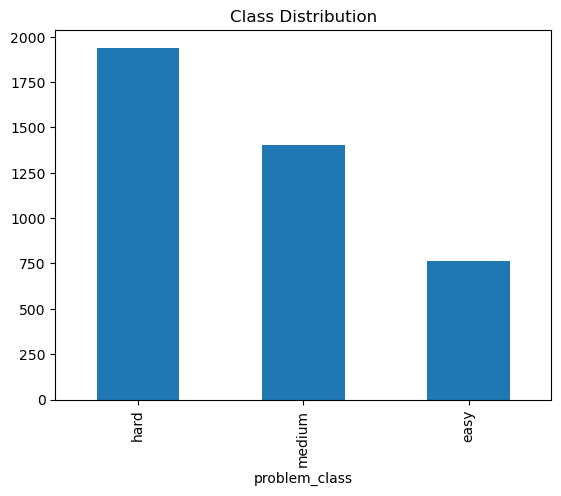

In [21]:
import matplotlib.pyplot as plt
df["problem_class"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.show()

<h4>Class imbalance exists in the dataset,frequency of problems follows this order hard>medium>easy</h4>

In [22]:
ct = pd.crosstab(df["problem_class"], df["input_empty"])
ct_tab = ct.div(ct.sum(axis=1), axis=0) * 100
ct_tab

input_empty,0,1
problem_class,,
easy,98.172324,1.827676
hard,96.701031,3.298969
medium,97.010676,2.989324


<h4>Hence input_empty is a weak feature and should not be used for classifying problems</h4>

In [23]:
ct2=pd.crosstab(df["problem_class"],df["output_empty"])
ct2_tab=ct2.div(ct2.sum(axis=1),axis=0)*100
ct2_tab

output_empty,0,1
problem_class,,
easy,98.041775,1.958225
hard,96.340206,3.659794
medium,96.797153,3.202847


<h4>Hence output_empty is also a weak feature for classification</h4>

In [24]:
ct3=pd.crosstab(df["problem_class"],df["description_empty"])
ct3_tab=ct3.div(ct2.sum(axis=1),axis=0)*100
ct3_tab

description_empty,0,1
problem_class,,
easy,96.736292,3.263708
hard,98.814433,1.185567
medium,97.651246,2.348754


<h4>hence description_empty is also a weak feature for classification</h4>

<Figure size 800x400 with 0 Axes>

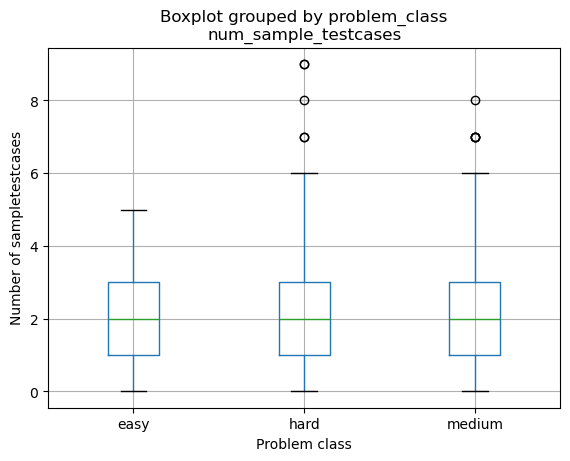

In [25]:
plt.figure(figsize=(8,4))
df.boxplot(column="num_sample_testcases",by="problem_class")
plt.xlabel("Problem class")
plt.ylabel("Number of sampletestcases")
plt.show()

<h4>num_sample_testcases is also a weak feature and need to be dropped as we can see in the plot there is no variation in the median as well as spread</h4>


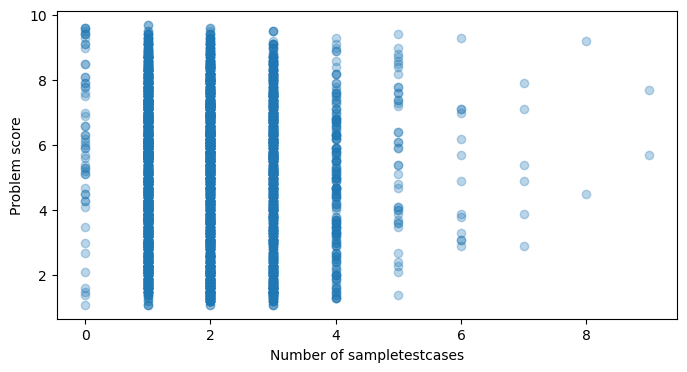

In [26]:
plt.figure(figsize=(8,4))
plt.scatter(df["num_sample_testcases"], df["problem_score"], alpha=0.3)
plt.xlabel("Number of sampletestcases")
plt.ylabel("Problem score")
plt.show()

<h4>from the graph its clear that number of sample testcases shows high variance with problem score</h4>

In [27]:
from scipy.stats import spearmanr
corr,p = spearmanr(df["num_sample_testcases"], df["problem_score"])
print(corr,p)


-0.04467393272384481 0.004171128183182064


<h4>This analysis gave a weak negative spearman correlation and hence this feature can be dropped for regression and earlier also we saw that it was not useful for classification as well so we will drop it </h4>

In [28]:
df=df.drop('num_sample_testcases', axis=1)

In [29]:
df.groupby("input_empty")["problem_score"].describe()

,count,mean,std,min,25%,50%,75%,max
input_empty,,,,,,,,
0,3991.0,5.097369,2.175898,1.1,3.300,5.20,6.9,9.7
1,120.0,5.679167,2.179041,1.2,4.075,5.75,7.5,9.6


<Figure size 500x400 with 0 Axes>

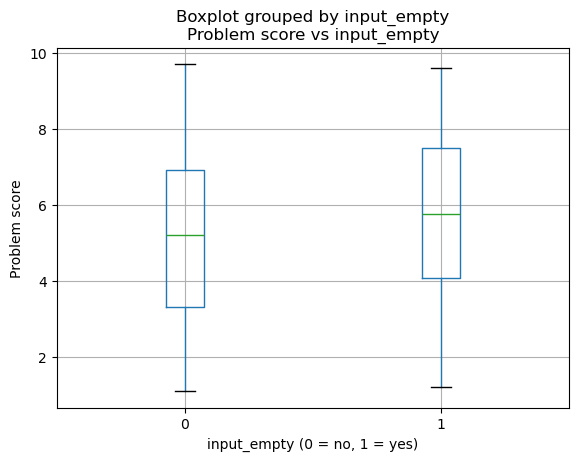

In [30]:
plt.figure(figsize=(5,4))
df.boxplot(column="problem_score", by="input_empty")
plt.title("Problem score vs input_empty")
plt.xlabel("input_empty (0 = no, 1 = yes)")
plt.ylabel("Problem score")
plt.show()

<h4>Problems with empty input descriptions show a marginally higher average problem score but the distributions overlap significantly and the group size is highly imbalanced (122 empty out of 3991). This indicates that input_empty is a weak predictor of problem score and hence can be dropped.Earlier also we saw input_empty was a weak feature for classification ,so we will just drop it from the dataset</h4>

In [31]:
df=df.drop('input_empty',axis=1)

In [32]:
df.groupby("output_empty")["problem_score"].describe()

,count,mean,std,min,25%,50%,75%,max
output_empty,,,,,,,,
0,3980.0,5.093945,2.173589,1.1,3.3,5.2,6.90,9.7
1,131.0,5.734351,2.226580,1.2,4.1,5.9,7.55,9.6


<Figure size 500x400 with 0 Axes>

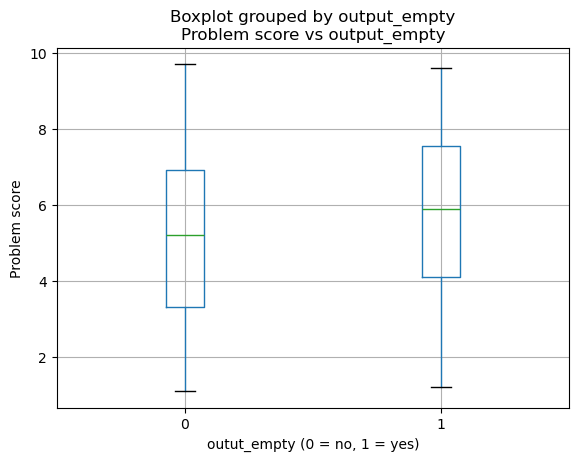

In [33]:
plt.figure(figsize=(5,4))
df.boxplot(column="problem_score",by="output_empty")
plt.title("Problem score vs output_empty")
plt.xlabel("outut_empty (0 = no, 1 = yes)")
plt.ylabel("Problem score")
plt.show()

<h4>Similarly this can be dropped too</h4>

In [34]:
df=df.drop('output_empty',axis=1)

In [35]:
df.groupby("description_empty")["problem_score"].describe()

,count,mean,std,min,25%,50%,75%,max
description_empty,,,,,,,,
0,4030.0,5.134739,2.174915,1.1,3.3,5.25,6.9,9.7
1,81.0,4.100000,2.097737,1.1,2.3,3.80,5.7,9.5


<Figure size 500x400 with 0 Axes>

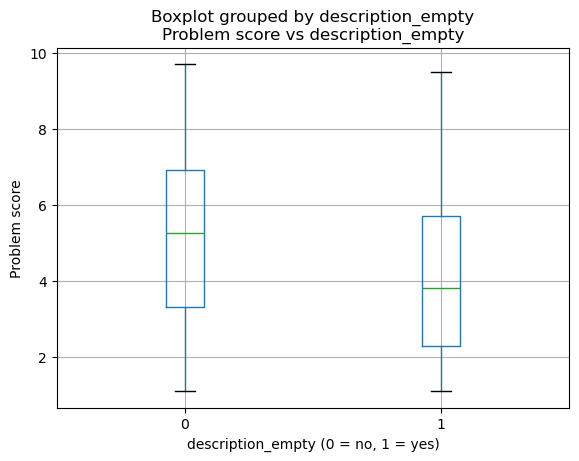

In [36]:
plt.figure(figsize=(5,4))
df.boxplot(column="problem_score", by="description_empty")
plt.title("Problem score vs description_empty")
plt.xlabel("description_empty (0 = no, 1 = yes)")
plt.ylabel("Problem score")
plt.show()

<h4>this feature will be used for regression task but since when we analysed it for classification ,it turned out to be a weak feature for it so we will not use this for classification task</h4>

In [37]:
corr = df[["char_count", "word_count", "digit_count", "symbol_count"]].corr()
corr

,char_count,word_count,digit_count,symbol_count
char_count,1.000000,0.958365,0.394769,0.345827
word_count,0.958365,1.000000,0.449472,0.298203
digit_count,0.394769,0.449472,1.000000,0.184876
symbol_count,0.345827,0.298203,0.184876,1.000000


<h4>since word_count and char_count have high correlation we will drop char_count as a feature</h4>

In [38]:
df=df.drop('char_count',axis=1)

In [39]:
df.groupby("problem_class")["word_count"].describe()

,count,mean,std,min,25%,50%,75%,max
problem_class,,,,,,,,
easy,766.0,161.917755,70.179246,13.0,113.25,153.0,195.75,506.0
hard,1940.0,217.922165,88.341049,32.0,157.00,205.0,261.25,763.0
medium,1405.0,201.619217,90.773148,26.0,145.00,186.0,243.00,1071.0


<Axes: xlabel='problem_class', ylabel='word_count'>

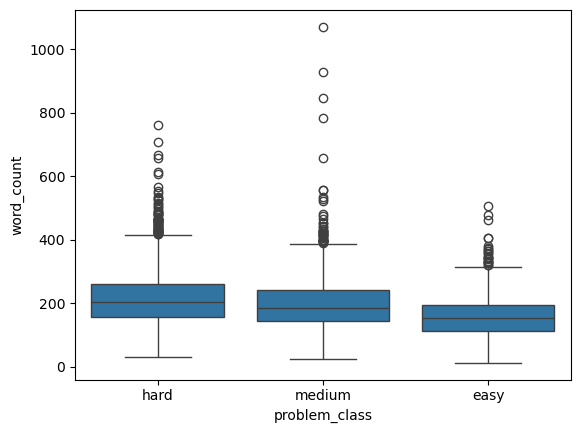

In [40]:
import seaborn as sns

sns.boxplot(x="problem_class", y="word_count", data=df)


<h4>char_count shows a consistent increase from easy to hard problems, indicating that more difficult problems tend to have longer descriptions eventhough distributions overlap significantly, the monotonic trend suggests that this feature might be helpful.</h4>

In [41]:
df.groupby("problem_class")["symbol_count"].describe()

,count,mean,std,min,25%,50%,75%,max
problem_class,,,,,,,,
easy,766.0,12.862924,37.269494,0.0,3.0,6.0,13.0,716.0
hard,1940.0,15.625258,18.009661,0.0,5.0,10.0,20.0,284.0
medium,1405.0,15.483986,28.002682,0.0,4.0,9.0,17.0,621.0


<Axes: xlabel='problem_class', ylabel='symbol_count'>

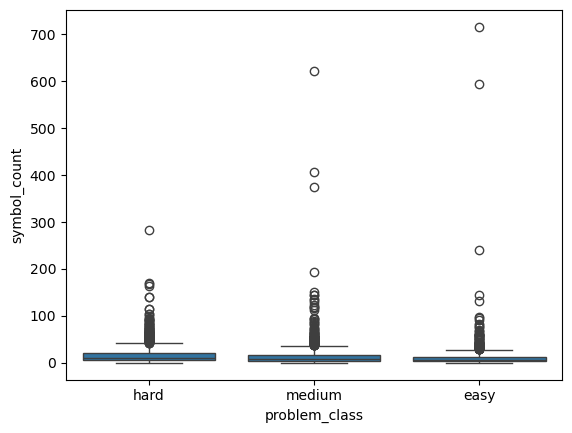

In [42]:
sns.boxplot(x="problem_class", y="symbol_count", data=df)


<h4>symbol_count is a very weak feature for problem classification,as there is heavy overlap between all three classes and whiskers and outliers dominate the plot,hence we will drop it</h4>

In [43]:
df.groupby("problem_class")["digit_count"].describe()

,count,mean,std,min,25%,50%,75%,max
problem_class,,,,,,,,
easy,766.0,41.084856,39.497456,0.0,15.0,30.0,54.0,326.0
hard,1940.0,57.907216,49.132208,0.0,28.0,46.0,73.0,504.0
medium,1405.0,58.858363,74.679013,0.0,26.0,43.0,72.0,1846.0


<Axes: xlabel='problem_class', ylabel='digit_count'>

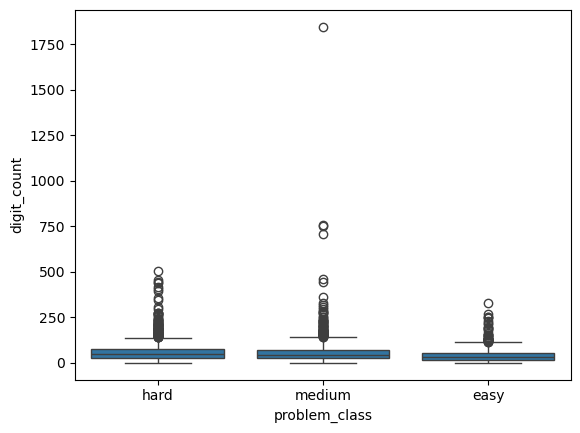

In [44]:
sns.boxplot(x="problem_class", y="digit_count", data=df)

<h4>digit_count exhibits high variance and overlapping distributions across difficulty classes but it shows a consistent increase in median values with problem difficulty and the trend is more evident than what we saw in symbol_count so we will keep this feature </h4>

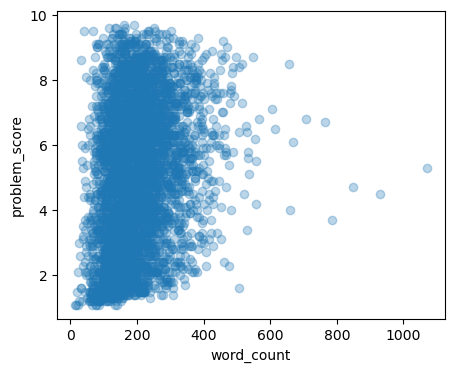

In [45]:
plt.figure(figsize=(5,4))
plt.scatter(df["word_count"], df["problem_score"], alpha=0.3)
plt.xlabel("word_count")
plt.ylabel("problem_score")
plt.show()


In [46]:
from scipy.stats import spearmanr

pearson = df["word_count"].corr(df["problem_score"], method="pearson")
spearman, p = spearmanr(df["word_count"], df["problem_score"])
pearson, spearman, p

(np.float64(0.23203890607828112),
 np.float64(0.25438891518997825),
 np.float64(9.854611291405747e-62))

<h4>Word count show a moderate positive correlation with problem score (Pearson = 0.23, Spearman = 0.25).Hence longer problem statements tend to be more difficult on average</h4>

In [47]:
CLASS_FEATURES = [
    "word_count",
        ]
REG_FEATURES = [
    "word_count",
    "description_empty" 
]

In [48]:
X_class = df[["raw_text"]+CLASS_FEATURES]
X_reg = df[["raw_text"]+REG_FEATURES]
y_class = df["problem_class"]  
y_score = df["problem_score"]

In [49]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class, y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_score,
    test_size=0.2,
    random_state=42
)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_transformer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2
)


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor_class = ColumnTransformer(
    transformers=[
        ("text", text_transformer, "raw_text"),
        ("num", StandardScaler(), CLASS_FEATURES)
    ]
)
preprocessor_reg = ColumnTransformer(
    transformers=[
        ("text", text_transformer, "raw_text"),
        ("num", StandardScaler(), REG_FEATURES)
    ]
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
log_clf = Pipeline([
    ("prep", preprocessor_class),
    ("clf", LogisticRegression(max_iter=1000, n_jobs=-1,class_weight="balanced")) 
])
log_clf.fit(Xc_train, yc_train)

log_preds = log_clf.predict(Xc_test)
f1=f1_score(yc_test, log_preds, average="macro")
print("Logistic Regression")
print("Accuracy:", accuracy_score(yc_test, log_preds))
labels=["easy", "medium", "hard"]
cm=confusion_matrix(yc_test, log_preds,labels = labels)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,       
    fmt="d",           
    cmap="Blues",     
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
print("F1:",f1)

<h4>A large number of hard problems have been correctly identified and also medium problems have been frequently misclassified as hard and vice versa as we can see in the confusion matrix.Hence its unable to separate the overlapping difficulty levels between medium and hard classes.</h4>

In [ ]:
from sklearn.svm import LinearSVC
svm_clf = Pipeline([
    ("prep", preprocessor_class),
    ("clf", LinearSVC(max_iter=3000,class_weight="balanced"))
])
svm_clf.fit(Xc_train, yc_train)
svm_preds = svm_clf.predict(Xc_test)
f1=f1_score(yc_test, svm_preds, average="macro")
print("support vector machines")
print("Accuracy:", accuracy_score(yc_test, svm_preds))
cm=confusion_matrix(yc_test, svm_preds,labels = labels)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,       
    fmt="d",           
    cmap="Blues",     
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

print("F1:",f1)

<h4>Hard class has been predicted the best while the medium class has been frequently wrongly classified as hard just like we observed in Logistic regression.Also compared to logistic regression easy class has been misclassified more..Lower accuracy than logistic regression and a lower F1 score.</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = Pipeline([
    ("prep", preprocessor_class),
    ("clf", RandomForestClassifier(n_estimators=300, random_state=42,class_weight='balanced'))
])
rf_clf.fit(Xc_train, yc_train)
rf_preds = rf_clf.predict(Xc_test)
f1=f1_score(yc_test, rf_preds, average="macro")
print("Random Forest Classifier")
print("Accuracy", accuracy_score(yc_test, rf_preds))
cm=confusion_matrix(yc_test, rf_preds,labels = labels)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,       
    fmt="d",           
    cmap="Blues",     
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
print("F1",f1)

<h4>accuracy is higher because randomforestclassifier predicts hard more often which is the majority class which increases accuracy but reduces F1.</h4

<h3>Though the metric values for the models tested above are quite close to each other, we have concluded Logistic regression as the best fit model for this case
as it has the highest f1 score and shows better performance across different classes .Random forest classifier on other hand shows higher accuracy metric but due to predicting the majority class correctly more while misclassifying other classes heavily, lower f1 score 
as it fails to handle the sparse TF-IDF features.</h3>

<h2>Regression</h2>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import numpy as np

linear_reg = Pipeline([
    ("prep", preprocessor_reg),
    ("reg", LinearRegression())
])

linear_reg.fit(Xr_train, yr_train)

linear_preds = linear_reg.predict(Xr_test)

mae = mean_absolute_error(yr_test, linear_preds)
mse = mean_squared_error(yr_test, linear_preds)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, linear_preds)
mape = mean_absolute_percentage_error(yr_test, linear_preds)

print("linear regression")
print("MAE", mae)
print("RMSE", rmse)
print("r2", r2)
print("MEAN ABS % ERROR", mape)


In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Pipeline([
    ("prep", preprocessor_reg),
    ("reg", Ridge(alpha=1.0))
])
ridge_reg.fit(Xr_train, yr_train)
ridge_preds = ridge_reg.predict(Xr_test)
mae = mean_absolute_error(yr_test, ridge_preds)
mse = mean_squared_error(yr_test, ridge_preds)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, ridge_preds)
mape = mean_absolute_percentage_error(yr_test, ridge_preds)
print("ridge regression")
print("MAE", mae)
print("RMSE", rmse)
print("r2",r2)
print("MEAN ABS % ERROR",mape)

<h4>Linear regression gave high MAE value due to high dimensional and sparse features of TF-IDF so we used ridge regression instead which regularizes this and gives lower MAE</h4>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = Pipeline([("prep", preprocessor_reg), ("reg", RandomForestRegressor(n_estimators=80,
        max_depth=12,
        n_jobs=-1,
        random_state=42))])
rf_reg.fit(Xr_train, yr_train)
rfg_preds = rf_reg.predict(Xr_test)
mae = mean_absolute_error(yr_test, rfg_preds)
mse = mean_squared_error(yr_test, rfg_preds)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, rfg_preds)
mape = mean_absolute_percentage_error(yr_test, rfg_preds)
print("Random forest regression")
print("MAE", mae)
print("RMSE", rmse)
print("r2",r2)
print("MEAN ABS % ERROR",mape)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = Pipeline([
    ("prep", preprocessor_reg),
    ("reg", GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])
gb_reg.fit(Xr_train, yr_train)
gb_preds = gb_reg.predict(Xr_test)
mae = mean_absolute_error(yr_test, gb_preds)
rmse = np.sqrt(mean_squared_error(yr_test, gb_preds))
r2 = r2_score(yr_test, gb_preds)
mape = mean_absolute_percentage_error(yr_test, gb_preds)

print("Gradient Boosting Regression")
print("MAE", mae)
print("RMSE", rmse)
print("r2",r2)
print("MEAN ABS % ERROR",mape)

<h3>All three regression models achieved similar performance . Although GradientBoostingRegressor and RandomForestRegressor  achieved marginally better MAE and R².I have selected Ridge Regression  as the final model due to its stability,  and better handling of high-dimensional TF-IDF features.</h3>

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(yr_test, gb_preds, alpha=0.4)
plt.plot([1,10], [1,10], '--') 
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Problem Score (GradientBoosting)")
plt.show()


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(yr_test,rfg_preds, alpha=0.4)
plt.plot([1,10], [1,10], '--') 
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Problem Score (RandomForest)")
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(yr_test, ridge_preds, alpha=0.4)
plt.plot([1,10], [1,10], '--') 
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Problem Score (Ridge)")
plt.show()

<h3>The plots further validate the Ridge Model as there is a positive linear relationship between the actual and predicted score on other hand in RandomForest the predictions are concentrated around the mean and a flattened slope .In Gradient Boosting some improvisation has been done as compared to RandomForest but improvements are pretty small .</h3>

In [ ]:
import joblib

In [ ]:
joblib.dump(log_clf, "logistic_regression.joblib")

In [ ]:
joblib.dump(ridge_reg, "ridge_regressor.joblib")

<h4>ordinal classification by mapping</h4>

In [ ]:
df.groupby("problem_class")["problem_score"].describe()


<h4>There is a strict range that the classes are following the easy problems have a score less than equal to 2.8 and medium problems have it b/w 2.8-5.5 and the hard problems have it greater than equal to 5.5</h4>

In [ ]:
def score_to_class(score ,thresh_1,thresh_2):
    if score<thresh_1:
        return "easy"
    elif score<thresh_2:
        return "medium"
    else:
        return "hard"


In [ ]:
Xr_tr, Xr_val, yr_tr, yr_val, yc_tr, yc_val = train_test_split(
    Xr_train,
    yr_train,
    yc_train,
    test_size=0.2,
    random_state=42
)

In [ ]:
ridge_reg.fit(Xr_tr, yr_tr)
value_score_preds = ridge_reg.predict(Xr_val)


In [ ]:
best_f1 = -1
best_thresh_1 = None
best_thresh_2 = None
thresh_1_values = np.arange(2.6, 3.3, 0.1)
thresh_2_values = np.arange(5.2,5.8, 0.1)

for thresh_1 in thresh_1_values:
    for thresh_2 in thresh_2_values:
        if thresh_2 <= thresh_1:
            continue
        preds = [score_to_class(s, thresh_1, thresh_2) for s in value_score_preds]
        f1 = f1_score(yc_val, preds, average="macro") 
        if f1 > best_f1:
            best_f1 = f1
            best_thresh_1 = thresh_1
            best_thresh_2 = thresh_2

print("first threshold:", best_thresh_1)
print("second threshold:", best_thresh_2)
print("Macro F1:", best_f1)

In [ ]:
test_score_preds = ridge_reg.predict(Xr_test)
test_class_preds = [score_to_class(s, best_thresh_1,best_thresh_2) for s in test_score_preds]

In [ ]:
print("Accuracy:", accuracy_score(yc_test, test_class_preds))
print("Macro F1:", f1_score(yc_test, test_class_preds, average="macro"))

<h4>This gives an accuracy even worse than what we got from the direct classification models since our score prediction is quite noisy and has an MAE near about 1.7,so grid search can only optimize the threshold placement but not these shortcomings</h4>

<h4>hence we will use logistic regression as our final classification model for finding problem_class</h4>